In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Setting the random seed
np.random.seed(30)

In [3]:
def step_function(t):
    return 1 if t >= 0 else 0

In [4]:
def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

In [5]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        yhat = prediction(X[i], W, b)
        delta = y[i] - yhat
        if delta == 1:
            W[0] += learn_rate * X[i][0]
            W[1] += learn_rate * X[i][1]
            b += learn_rate
        elif delta == -1:
            W[0] -= learn_rate * X[i][0]
            W[1] -= learn_rate * X[i][1]
            b -= learn_rate
    return W, b
    

In [15]:

def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    '''This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.'''
    
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [8]:
data = np.loadtxt("data.csv", delimiter=",")

In [16]:
# Train the perceptron algorithm
boundary_lines = trainPerceptronAlgorithm(data[:, [0, 1]], data[:, 2], learn_rate=0.1, num_epochs=50)

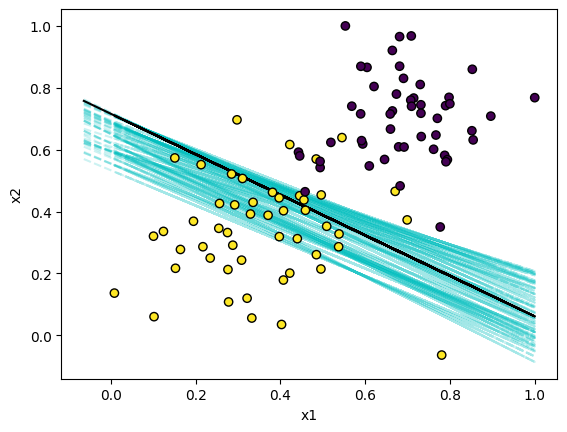

In [20]:
# Plot boundary lines
fig, ax = plt.subplots()
for i, line in enumerate(boundary_lines):
    x_vals = data[:, [0, 1]]
    y_vals = line[0] * x_vals + line[1]
    if i == len(boundary_lines) - 1:
        ax.plot(x_vals, y_vals, 'black')
    else:
      ax.plot(x_vals, y_vals, 'c--', alpha = 0.2)

scatter = ax.scatter(data[:, 0], data[:, 1], c=data[:, 2], marker="o", edgecolors="black")
scatter.set_zorder(10)
# Add labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
# Show the plot
plt.show()